In [3]:
from tensorflow.keras.layers import Dense,Flatten,Input
from keras import activations
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
from glob import glob

In [4]:
Img_size=[256,256]

In [5]:
train_path="/content/drive/MyDrive/cotton_plant disease pred CNN/train"
val_path="/content/drive/MyDrive/cotton_plant disease pred CNN/val"

In [6]:
resnet=ResNet50(input_shape=Img_size+[3],weights='imagenet',include_top=False)

94765736/94765736 [==============================] - 0s 0us/step


In [7]:
for layer in resnet.layers:
  layer.trainable=False

In [8]:
folders=glob("/content/drive/MyDrive/cotton_plant disease pred CNN/train/*")

In [9]:
x=Flatten()(resnet.output)
x=Dense(128,activation='relu')(x)
pred=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=resnet.input,outputs=pred)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen_data=ImageDataGenerator(rescale=1/255,shear_range=.2,zoom_range=.2,horizontal_flip=True)
test_gen_data=ImageDataGenerator(rescale=1/255)

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
training_set=train_gen_data.flow_from_directory("/content/drive/MyDrive/cotton_plant disease pred CNN/train",target_size=(256,256),batch_size=32,class_mode='categorical')

Found 1951 images belonging to 4 classes.


In [14]:
testing_set=test_gen_data.flow_from_directory("/content/drive/MyDrive/cotton_plant disease pred CNN/val",target_size=(256,256),batch_size=32,class_mode='categorical')

Found 324 images belonging to 4 classes.


In [16]:
result=model.fit_generator(training_set,
                           validation_data=testing_set,
                           epochs=20,
                           )

<ipython-input-16-90973ffa2afe>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result=model.fit_generator(training_set,


Epoch 1/20
61/61 [==============================] - 538s 9s/step - loss: 2.0006 - accuracy: 0.4316 - val_loss: 1.0772 - val_accuracy: 0.4753
Epoch 2/20
61/61 [==============================] - 43s 697ms/step - loss: 1.1598 - accuracy: 0.5315 - val_loss: 1.1532 - val_accuracy: 0.4846
Epoch 3/20
61/61 [==============================] - 43s 700ms/step - loss: 1.0326 - accuracy: 0.5951 - val_loss: 0.8709 - val_accuracy: 0.6636
Epoch 4/20
61/61 [==============================] - 44s 719ms/step - loss: 0.9835 - accuracy: 0.6248 - val_loss: 0.8332 - val_accuracy: 0.6883
Epoch 5/20
61/61 [==============================] - 42s 696ms/step - loss: 0.8400 - accuracy: 0.6612 - val_loss: 0.8236 - val_accuracy: 0.6574
Epoch 6/20
61/61 [==============================] - 43s 700ms/step - loss: 1.0317 - accuracy: 0.6125 - val_loss: 1.1017 - val_accuracy: 0.6019
Epoch 7/20
61/61 [==============================] - 43s 702ms/step - loss: 0.9947 - accuracy: 0.6089 - val_loss: 0.8710 - val_accuracy: 0.6944
E

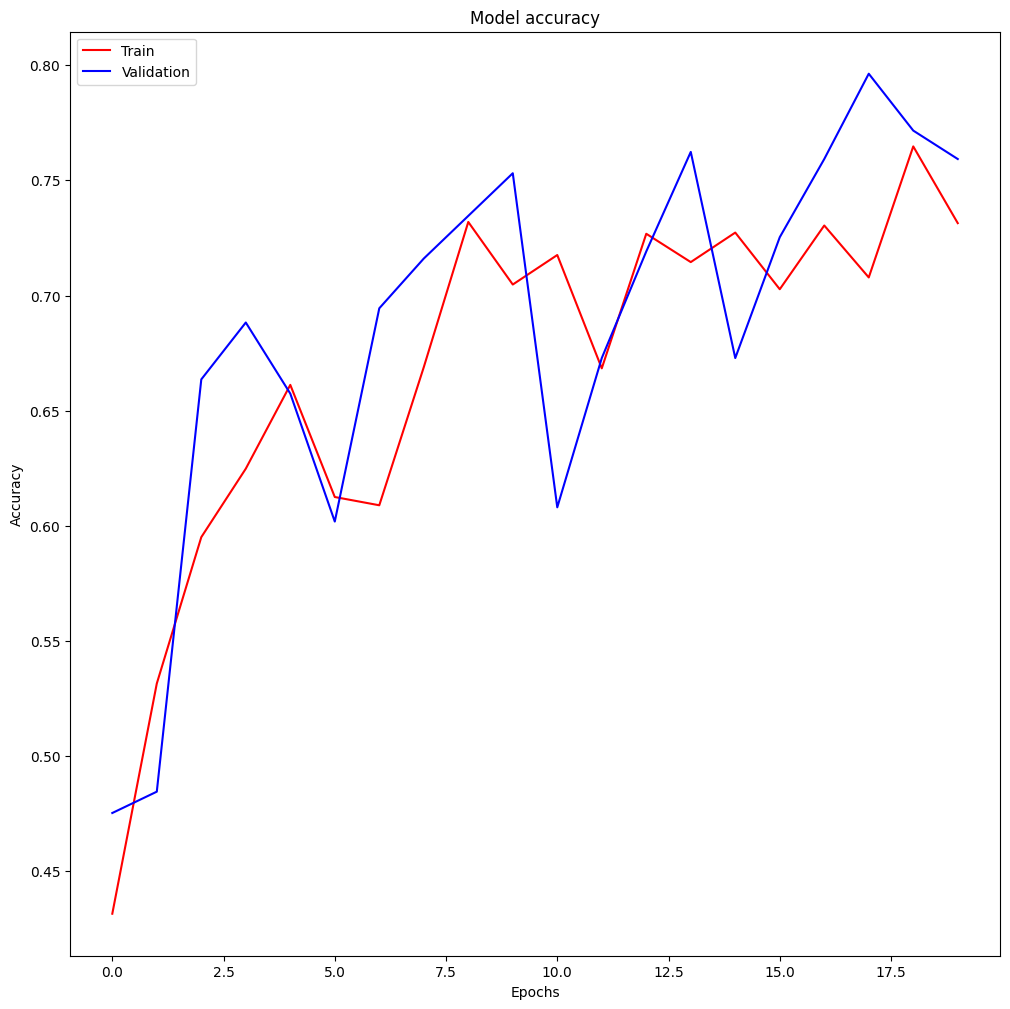

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.plot(result.history['accuracy'], color='r')
plt.plot(result.history['val_accuracy'], color='b')
plt.title("Model accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()